## **Import libraries**

In [193]:
import numpy as np # for calculation
import matplotlib.pyplot as plt # for plotting and viewing
import os # for loading images
from PIL import Image # for loading images 

## **Load images**

In [196]:
# define my image path
images_path = 'C:/Users/yangq/OneDrive/Desktop/computer vision/archive (1)/train'

# define lists to store image and label respectively
images = []
labels = []

# load our image
for folder_name in os.listdir(images_path):
    folder_path = os.path.join(images_path, folder_name)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            images.append(img)
            labels.append(folder_name)

### (2.1) show the image

Label: cats


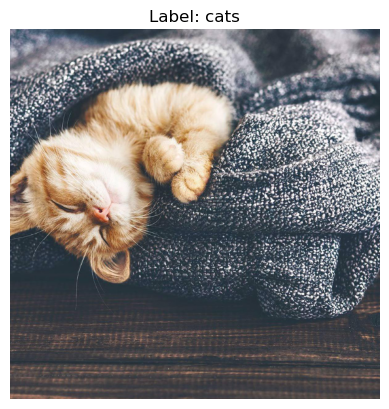

In [199]:
print(f"Label: {labels[7]}")
plt.imshow(images[7])
plt.axis("off")  # Turn off the axes
plt.title(f"Label: {labels[7]}")
plt.show()

### (2.2) show image categories

In [170]:
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")

Unique labels: {'dogs', 'cats'}


### (2.3) each number of image

In [203]:
from collections import Counter

label_counts = Counter(labels)
print("Label counts:")
for label, count in label_counts.items():
    print(f"{label}: {count} images")

Label counts:
cats: 279 images
dogs: 278 images


## **Process dataset**

#### We obtain images and labels two lists, so if we want to use CNN models, we need to transfer them into the array respectively.

In [208]:
#  for our output
Y_1= np.array(labels)
Y_1

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

#### To transfer images list into an array, we need to check each image dimension first!

In [181]:
# check each image shape
for i, img in enumerate(images):
    print(f"Image {i} shape: {np.array(img).shape}")

Image 0 shape: (1333, 2000, 3)
Image 1 shape: (183, 275, 3)
Image 2 shape: (168, 300, 3)
Image 3 shape: (628, 1200, 3)
Image 4 shape: (162, 311, 3)
Image 5 shape: (159, 318, 3)
Image 6 shape: (549, 976, 3)
Image 7 shape: (1200, 1200, 3)
Image 8 shape: (176, 287, 3)
Image 9 shape: (1414, 2121, 3)
Image 10 shape: (2848, 4272, 3)
Image 11 shape: (500, 1400, 3)
Image 12 shape: (630, 1200, 3)
Image 13 shape: (648, 1155, 3)
Image 14 shape: (179, 282, 3)
Image 15 shape: (637, 640, 3)
Image 16 shape: (252, 400, 3)
Image 17 shape: (1200, 1200, 3)
Image 18 shape: (648, 1155, 3)
Image 19 shape: (549, 976, 3)
Image 20 shape: (667, 1000, 3)
Image 21 shape: (1050, 1400, 3)
Image 22 shape: (1329, 1920, 3)
Image 23 shape: (720, 1280, 3)
Image 24 shape: (2049, 3000, 3)
Image 25 shape: (225, 225, 3)
Image 26 shape: (600, 900, 3)
Image 27 shape: (675, 1200, 3)
Image 28 shape: (720, 1280, 3)
Image 29 shape: (683, 1024, 3)
Image 30 shape: (200, 350, 3)
Image 31 shape: (626, 626, 3)
Image 32 shape: (450, 80

#### So we need to rehape each image, the each new image has the same dimension.

In [213]:
# define output image size
output_size = (224, 224)  # (Height, Width)

# reshape all images to the target size
resized_images = []
for i, img in enumerate(images):
    # Ensure all images are in RGB format (3 channels)
    img = img.convert("RGB")  # Convert to RGB
    img_resized = img.resize(output_size)  # Resize the image
    img_array = np.array(img_resized)  # Convert to NumPy array
    resized_images.append(img_array) # add new image into the array

### (3.2) convert it into an np.array

In [215]:
# Convert the resized images list to a single NumPy array
image_array = np.array(resized_images)
print("Final array shape:", image_array.shape)

Final array shape: (557, 224, 224, 3)


## **MobileNetV2**

## There are some limits of using the pre-trained MobileNetV2 model  

### (1) The input image deminision must be (224, 224, 3)

### (2) Your images must be in 1000 classes (ImageNet dataset categories)

### Because we use ImageNet dataset to pre-train the model, so we do not need to use our images to train the model

### (4.1) Import the model

In [229]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

In [237]:
pretrained_model = MobileNetV2(include_top = True, weights = 'imagenet')
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

### (4.2) Normalize images

### Most pre-trained models require pixel values to be normalized. For MobileNetV2, use the preprocess_input function:

In [255]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Preprocess the images
image_array1 = preprocess_input(image_array)  # Normalize to range [-1, 1]
image_array1.shape

(557, 224, 224, 3)

In [261]:
resized_images1 = tf.image.resize(image_array1, (224, 224))
resized_images1.shape

TensorShape([557, 224, 224, 3])

### (4.3) Make Predictions

In [264]:
predictions = pretrained_model.predict(image_array1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step


## (4.4) Decode the result

### Use decode_prediction to decode the result

#### We need to resize the nparray to the tensor, so that we can use decode function.

In [273]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

# Decode top 5 predictions for each image
decoded_predictions = decode_predictions(predictions, top=5)
for i, preds in enumerate(decoded_predictions):
    print(f"Image {i+1}:")
    for rank, (class_id, label, prob) in enumerate(preds):
        print(f"  {rank+1}: {label} ({prob:.2f})")

Image 1:
  1: tabby (0.57)
  2: tiger_cat (0.31)
  3: Egyptian_cat (0.03)
  4: tiger (0.01)
  5: lynx (0.01)
Image 2:
  1: Egyptian_cat (0.29)
  2: lynx (0.11)
  3: Persian_cat (0.10)
  4: tabby (0.06)
  5: tiger_cat (0.02)
Image 3:
  1: Egyptian_cat (0.71)
  2: tabby (0.07)
  3: Siamese_cat (0.06)
  4: Persian_cat (0.03)
  5: tiger_cat (0.01)
Image 4:
  1: Persian_cat (0.61)
  2: lynx (0.14)
  3: Egyptian_cat (0.11)
  4: tabby (0.02)
  5: tiger_cat (0.01)
Image 5:
  1: Egyptian_cat (0.65)
  2: tabby (0.07)
  3: lynx (0.02)
  4: Siamese_cat (0.02)
  5: tiger_cat (0.01)
Image 6:
  1: tabby (0.27)
  2: tiger_cat (0.11)
  3: lynx (0.07)
  4: Egyptian_cat (0.03)
  5: Persian_cat (0.03)
Image 7:
  1: sunglasses (0.14)
  2: sunglass (0.10)
  3: Siamese_cat (0.08)
  4: Egyptian_cat (0.07)
  5: llama (0.06)
Image 8:
  1: Persian_cat (0.45)
  2: tiger_cat (0.11)
  3: tabby (0.05)
  4: doormat (0.03)
  5: jean (0.02)
Image 9:
  1: fox_squirrel (0.09)
  2: grey_fox (0.05)
  3: wood_rabbit (0.02)


###  The output only has two classes (cats and dogs), the ImageNet pre-trained model's original classification head (1000 classes) cannot directly evaluate or classify your data. So, we can fine-tune the pre-trained model.